In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import squarify
import pickle
import joblib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'

from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud
from PIL import Image
from sentence_transformers import SentenceTransformer

In [2]:
file_path = 'C:\\Users\\이진호\\Desktop\\국토지리정보원 인턴 프로젝트\\그룹 프로젝트 - 공간정보 설문\\01.files\\공간정보 설문조사.xlsx'

# 엑셀 파일의 모든 시트 읽기
sheets = pd.ExcelFile(file_path).sheet_names  # 모든 시트 이름 가져오기

# 모든 시트 데이터를 저장할 딕셔너리
dataframes = {}

# 각 시트 처리
for sheet_name in sheets:
    # 시트별로 데이터프레임 생성 (4행을 헤더로 지정, 열은 1,2,3열만 사용)
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=3, usecols=[0,1,2])
    # 시트 이름을 키로, 데이터프레임을 값으로 저장
    dataframes[sheet_name] = df

In [15]:
# 워드클라우드 생성 함수
def create_wordcloud(df, image_path, title, name):

    okt = Okt()
    text_data = df['설문내용'].tolist()

    # 형태소 분석 및 키워드 추출, 불용어 제거
    keywords = [okt.nouns(text) for text in text_data]
    stopwords = pd.read_excel('C:\\Python Data\\불용어.xlsx')
    keywords_flat = [word for sublist in keywords for word in sublist if len(word) > 1 and word not in stopwords]

    # 키워드 빈도 계산
    freq = Counter(keywords_flat)
    font_path = 'C:\\Users\\이진호\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf'
    mask_image = np.array(Image.open(image_path))

    wordcloud = WordCloud(mask=mask_image, background_color='white', font_path=font_path).generate_from_frequencies(freq)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.savefig(f'C:\\Users\\이진호\\Desktop\\국토지리정보원 인턴 프로젝트\\그룹 프로젝트 - 공간정보 설문\\05.visualization\\{name}.png', dpi=300, bbox_inches='tight')
    plt.show()

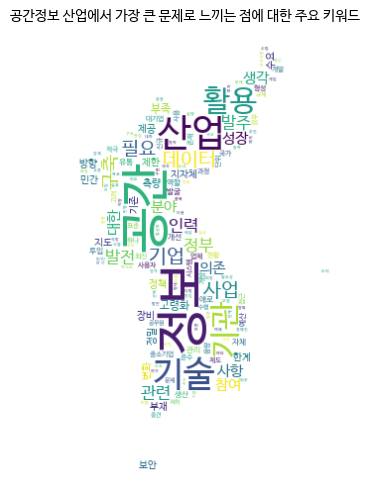

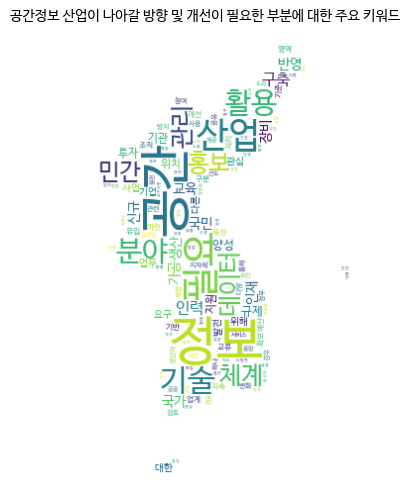

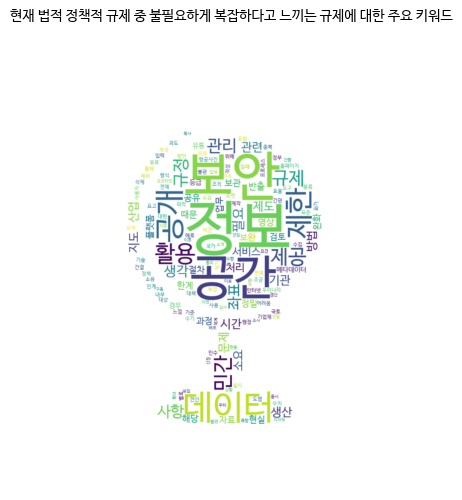

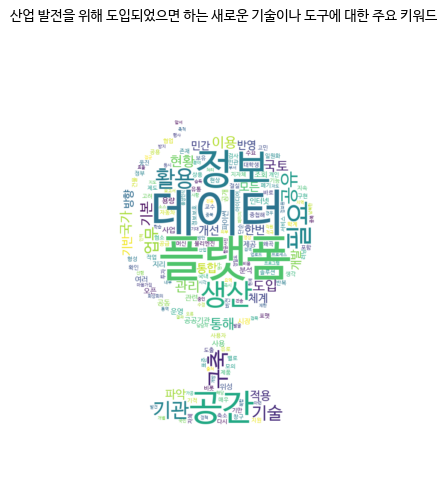

In [18]:
image_path = 'C:\\Users\\이진호\\Desktop\\국토지리정보원 인턴 프로젝트\\그룹 프로젝트 - 공간정보 설문\\02.images\\한반도.jpg'
create_wordcloud(dataframes['설문1번'], image_path, '공간정보 산업에서 가장 큰 문제로 느끼는 점에 대한 주요 키워드', '1번-워드클라우드')
create_wordcloud(dataframes['설문2번'], image_path, '공간정보 산업이 나아갈 방향 및 개선이 필요한 부분에 대한 주요 키워드', '2번-워드클라우드')

image_path = 'C:\\Users\\이진호\\Desktop\\국토지리정보원 인턴 프로젝트\\그룹 프로젝트 - 공간정보 설문\\02.images\\지구본.png'
create_wordcloud(dataframes['설문3번'], image_path, '현재 법적 정책적 규제 중 불필요하게 복잡하다고 느끼는 규제에 대한 주요 키워드', '3번-워드클라우드')
create_wordcloud(dataframes['설문4번'], image_path, '산업 발전을 위해 도입되었으면 하는 새로운 기술이나 도구에 대한 주요 키워드', '4번-워드클라우드')

In [19]:
def create_treemap(df, title, name):
     # 값별 비율 계산
     value_counts = df['주제(키워드)'].value_counts(normalize=True)  # 각 값의 비율 계산
     result = value_counts.reset_index()  # 인덱스를 리셋하여 데이터프레임으로 변환
     result.columns = ['topic', 'ratio']  # 열 이름 변경

     sizes = result['ratio']
     labels = [f"{row[0]}\n{round(row[1]*100,1)}%" for row in result.values]

     plt.figure(figsize=(8,6))
     squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette("Spectral", len(result)))
     plt.title(title, fontsize=15)
     plt.axis('off')
     plt.savefig(f'C:\\Users\\이진호\\Desktop\\국토지리정보원 인턴 프로젝트\\그룹 프로젝트 - 공간정보 설문\\05.visualization\\{name}.png', dpi=300, bbox_inches='tight')
     plt.show()

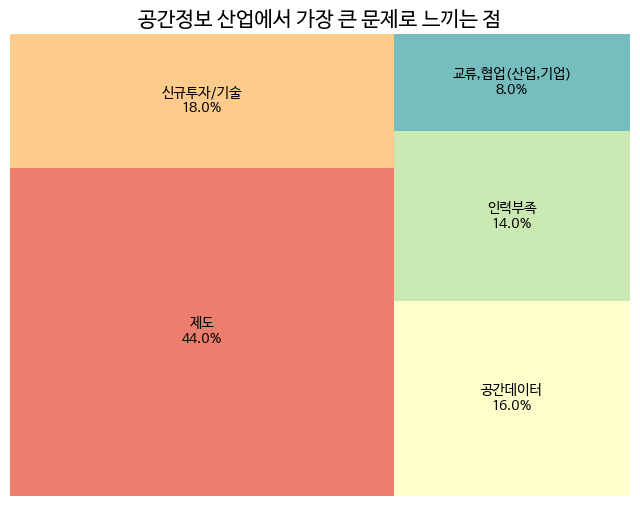

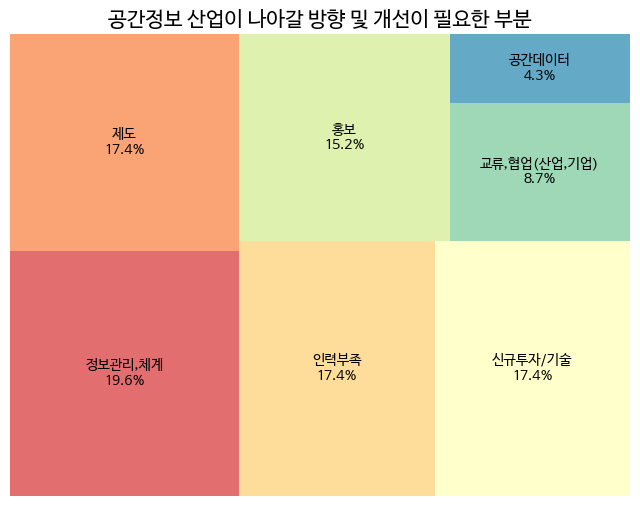

In [20]:
create_treemap(dataframes['설문1번'], '공간정보 산업에서 가장 큰 문제로 느끼는 점', '1번-트리맵')
create_treemap(dataframes['설문2번'], '공간정보 산업이 나아갈 방향 및 개선이 필요한 부분', '2번-트리맵')

In [ ]:
def create_piechart(df, title, name):
     # 값별 비율 계산
     value_counts = df['주제(키워드)'].value_counts(normalize=True)  # 각 값의 비율 계산
     result = value_counts.reset_index()  # 인덱스를 리셋하여 데이터프레임으로 변환
     result.columns = ['topic', 'ratio']  # 열 이름 변경

     sizes = result['ratio']
     labels = [f"{row[0]}" for row in result.values]
     explode = [0] * len(result)
     explode[0] = 0.1

     plt.figure(figsize=(8,6))
     plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode)
     plt.title(title, fontsize=15)
     plt.savefig(f'C:\\Users\\이진호\\Desktop\\국토지리정보원 인턴 프로젝트\\그룹 프로젝트 - 공간정보 설문\\05.visualization\\{name}.png', dpi=300, bbox_inches='tight')
     plt.show()

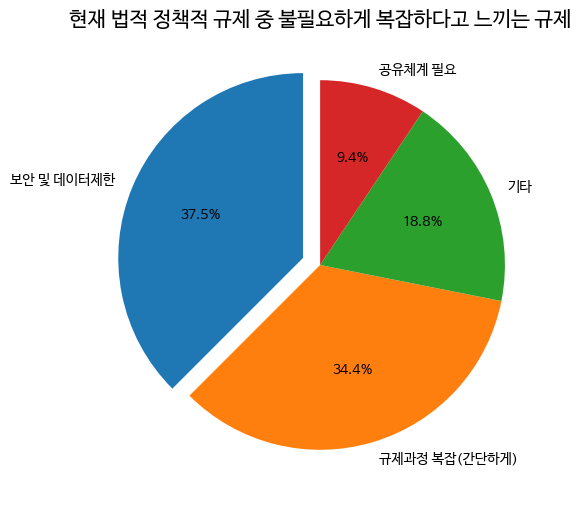

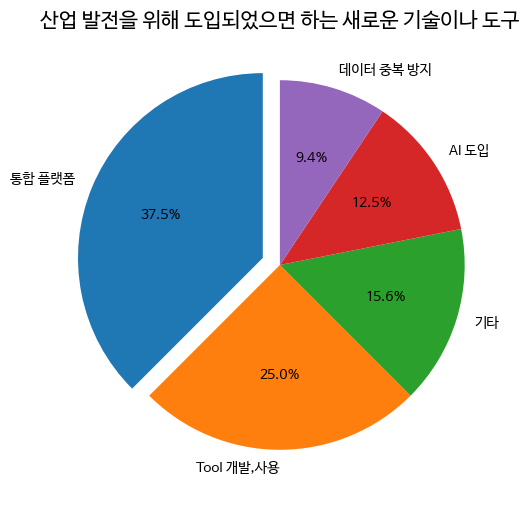

In [22]:
create_piechart(dataframes['설문3번'], '현재 법적 정책적 규제 중 불필요하게 복잡하다고 느끼는 규제', '3번-파이차트')
create_piechart(dataframes['설문4번'], '산업 발전을 위해 도입되었으면 하는 새로운 기술이나 도구', '4번-파이차트')

아래부터는 설문 1번(공간정보 산업에서 가장 큰 문제로 느끼는 점)에 대한 응답자들의 감정 분석 코드이다.

In [23]:
# 감정 분석을 위한 scaler와 model 변수 불러오기
with open('C:\\Users\\이진호\\Desktop\\국토지리정보원 인턴 프로젝트\\그룹 프로젝트 - 공간정보 설문\\04.variables\\scaler.pickle', 'rb') as f:
    new_scaler = pickle.load(f)
model = joblib.load('C:\\Users\\이진호\\Desktop\\국토지리정보원 인턴 프로젝트\\그룹 프로젝트 - 공간정보 설문\\04.variables\\svc_model.pkl')

In [24]:
class text_embedding():
  def __init__(self, model_name):
    self.model_name = model_name

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    embedding_model = SentenceTransformer(self.model_name)
    embedding_vec = embedding_model.encode(X['발화문'])
    X_val = np.concatenate((X.drop(['final_label', '발화문'], axis = 1), embedding_vec), axis = 1)
    return X_val
  
  
def sentiment_analysis(txt):
  d = pd.DataFrame(columns=['발화문', 'final_label'])
  d.loc[0] = [txt,'']
  t = text_embedding(model_name = 'jhgan/ko-sbert-multitask').transform(d)
  t_scaled = new_scaler.transform(t)

  # 0:긍정  1:부정
  result = model.predict_proba(t_scaled)
  emotion_dict = {'긍정': round(result[0][0]*100,2), '부정': round(result[0][1]*100,2)}
  final_emotion = ''

  if np.argmax(result) == 0:
    final_emotion = '긍정'
  elif np.argmax(result) == 1:
    final_emotion = '부정'

  return final_emotion, emotion_dict[final_emotion]

In [25]:
new_df = dataframes['설문1번'].copy()
new_df[['감정', '확률']] = new_df['설문내용'].apply(lambda x: pd.Series(sentiment_analysis(x)))
new_df

,순번,주제(키워드),설문내용,감정,확률
0,1,제도,"공간 정보 데이터 생산, 유통, 관리에 대하여 강제할 수 없고 역할이 나뉘어져 있어...",부정,95.52
1,2,제도,"정부 및 지자체, 공공 발주에 의존적인 산업구조 (정해진 먹거리가 있다보니 기업 자...",부정,88.55
2,3,공간데이터,"공간정보 구축, 활용 장비 및 SW의 외산 의존도가 높음",부정,74.80
3,4,제도,산업계가 정부 발주 사업에 의존하고 있으며 자체적인 사업모델 발굴 등 역량 미흡,부정,80.47
4,5,신규투자/기술,많은 예산이 투입되어 구축되는 공간정보가 보다 더 다양한 분야에서 실효성 있게 활용...,부정,68.94
5,6,제도,실사용자가 원하는 방향으로 기관의 목표나 비전 등이 수립되어야하나 공간정보 제작기관...,부정,90.50
6,7,제도,민간영역(지도 제작 등)을 국가가 할 필요가 없다고 본다.,부정,69.45
7,8,제도,정부주도의 사업위주로 산업이 형성되어 있어 규모확장에 한계가 있음.,부정,83.44
8,9,"교류,협업(산업,기업)",민간기업에서 지도를 (공간정보) 이용한 응용사업이 많이 생겨나기를 희망함 \n(ex...,부정,51.74
9,10,"교류,협업(산업,기업)",국민과 지자체의 관심이 부족하다.,부정,92.76


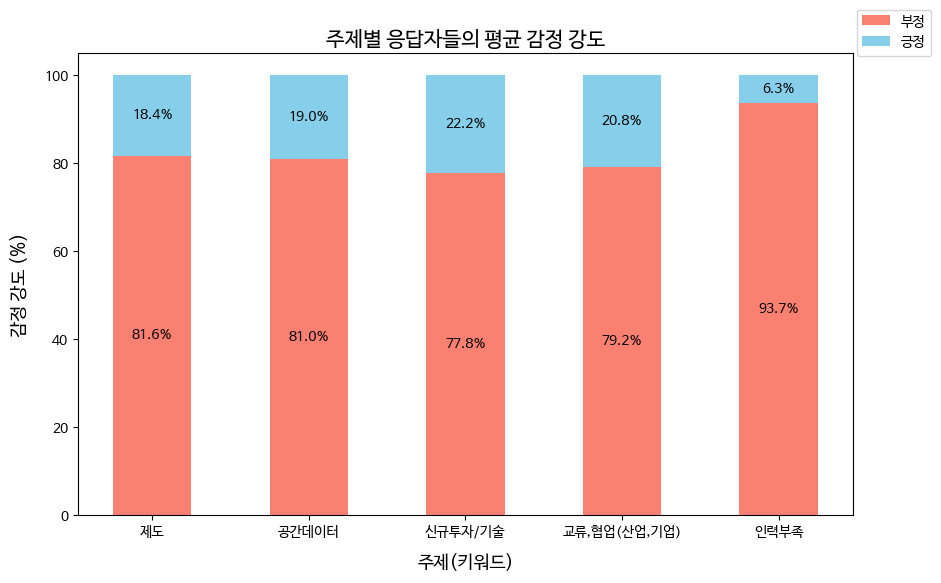

In [ ]:
topic, neg = [], []
for t in list(new_df['주제(키워드)'].unique()):
    topic.append(t)
    neg.append(round(new_df[(new_df['주제(키워드)']==t) & (new_df['감정']=='부정')]['확률'].mean(),1))

pos = [round(100 - n, 1) for n in neg]

d = {'주제':topic,
     '부정':neg,
     '긍정':pos}
d = pd.DataFrame(d)

x = np.arange(len(d['주제']))
width = 0.5

plt.figure(figsize=(10,6))
plt.bar(x, d['부정'], width, label='부정', color='salmon')
plt.bar(x, d['긍정'], width, bottom=d['부정'], label='긍정', color='skyblue')

for i in range(len(d)):
    plt.text(x[i], d['부정'][i] / 2, f"{d['부정'][i]}%", ha='center', va='center', color='black')
    plt.text(x[i], d['부정'][i] + d['긍정'][i] / 2 , f"{d['긍정'][i]}%", ha='center', va='center', color='black')

plt.xticks(x, d['주제'])
plt.xlabel('주제(키워드)', fontsize=13, labelpad=10)
plt.ylabel('감정 강도 (%)', fontsize=13, labelpad=10)
plt.title('주제별 응답자들의 평균 감정 강도', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.11,1.11))
plt.savefig('C:\\Users\\이진호\\Desktop\\국토지리정보원 인턴 프로젝트\\그룹 프로젝트 - 공간정보 설문\\05.visualization\\1번-누적막대차트.png', dpi=300, bbox_inches='tight')
plt.show()